In [5]:
% some housekeeping stuff
register_graphics_toolkit("gnuplot");
available_graphics_toolkits();
graphics_toolkit("gnuplot")
clear
%pkg load statistics
% end of housekeeping

# Data

|Solution|Absorbance at 650 nm
|------|------|
!0.10 ppm P     |0.050     |
|1.00 ppm P     |0.200     |
|2.00 ppm P     |0.436     |
|3.00 ppm P     |0.668     |
|4.00 ppm P     |0.818     |
|5.00 ppm P     |1.050     |
|8.00 ppm P     |1.500     |
|Urine sample   |0.518     |

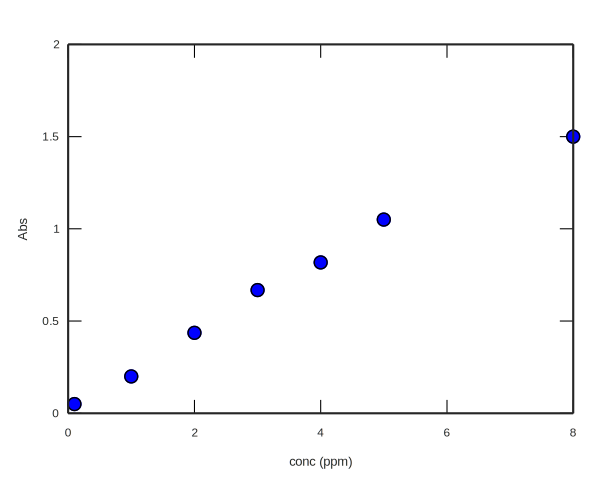

In [6]:
%plot -s 600,500 -f 'svg'
conc=[0.1  1 2 3 4 5 8];
A=[0.05  0.20 0.436 0.668 0.818 1.05 1.5];
plot(conc, A,'ko','markersize',4,'markerfacecolor','b')
set(gca,'linewidth',2,'fontsize',11)
xlabel('conc (ppm)'); ylabel('Abs')

# confidence envelope around regression line

equation 8-18 from the text book

$$s_c=\dfrac{s_r}{m}\sqrt{\dfrac{1}{M}+\dfrac{1}{N}+\dfrac{(\bar{y_c}-\bar{y})^2}{m^2S_{xx}}}$$

slope = 0.1875
intercept = 0.055887


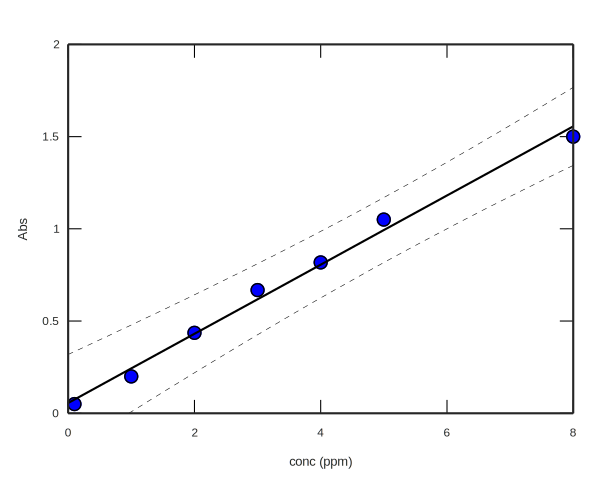

In [7]:
%plot -s 600,500 -f 'svg'
[param]=polyfit(conc,A,1); 
slope=param(1)
intercept=param(2)

concforfit=[0:1:10];
bestfit=slope.*concforfit+intercept;

plot(conc, A,'ko','markersize',4,'markerfacecolor','b')
set(gca,'linewidth',2,'fontsize',11)
xlabel('conc (ppm)'); ylabel('Abs')
hold on
plot(concforfit,bestfit,'k','linewidth',2)

% add on confidence limit about the estimated regression line
Ameas=A; Amodel=slope*conc+intercept;
resid=(Ameas-Amodel);
SSresid = sum(resid.^2); N=length(A);
sr=sqrt(SSresid/(N-2));
M=3; % only one replicate measurement
Sxx=sum(conc.^2)-((sum(conc))^2/N);
Syy=sum(A.^2)-((sum(A))^2/N);
Sxy=sum(conc.*A)-(sum(conc)*sum(A))/N;
m=Sxy/Sxx; 
sc=(sr/m)*sqrt(1/M+1/N+((Ameas-mean(A)).^2)/(m^2*Sxx));
xplot=0:0.1:10; Aplot=slope*xplot+intercept;
scprime=(sr/m)*sqrt(1/M+1/N+((Aplot-mean(Aplot)).^2)/(m^2*Sxx));

%p = .975; % 
%nu = N-2; 
%t = tinv(p,nu);

hold on
plot(xplot,Aplot+scprime,'k--')
plot(xplot,Aplot-scprime,'k--')

axis([0 8 0 2])

# consequences

Errors are larger at the ends of the calibration range.  The best performance is obtained at the middle of the calibration range.

To help with errors have more calibration points at the extremes but measure your samples in the middle.

Refer to Figure 8-11 on page 180 of your textbook.

Note: to estimate reproducibility of an unknown measurement typically replicate measurements are performed rather than error estimates based solely on the calibration line statistics.

concunknown = 8.2361
tol = 0.020000
range =

   7.3000   9.7000

delta = 2.4000


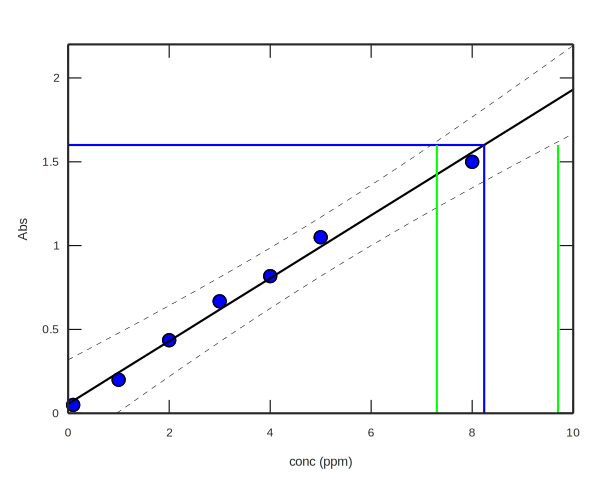

In [8]:
%plot -s 600,500 -f 'svg'
%Aunknown=0.518; %low end
%Aunknown=1.00; %middle
Aunknown=1.6; %high end
concunknown=(Aunknown-intercept)/slope
plot(conc, A,'ko','markersize',4,'markerfacecolor','b')
set(gca,'linewidth',2,'fontsize',11)
xlabel('conc (ppm)'); ylabel('Abs')
hold on
plot(concforfit,bestfit,'k','linewidth',2)
plot([0 concunknown],[Aunknown Aunknown],'b','linewidth',2)
plot([concunknown concunknown],[0 Aunknown],'b','linewidth',2)
hold on
plot(xplot,Aplot+scprime,'k--')
plot(xplot,Aplot-scprime,'k--')

topyplot=Aplot+scprime; tol=0.015;
bottomyplot=Aplot-scprime;

for i=1:length(xplot)
    if topyplot(i)>=Aunknown-Aunknown*tol
        if topyplot(i)<=Aunknown+Aunknown*tol
        lowx=xplot(i);
        end
    end
end

plot([lowx lowx],[0 Aunknown],'g','linewidth',2)

tol=0.02

for i=1:length(xplot)
    if bottomyplot(i)>=Aunknown-Aunknown*tol
        if bottomyplot(i)<=Aunknown+Aunknown*tol
        highx=xplot(i);
        end
    end
end

plot([highx highx],[0 Aunknown],'g','linewidth',2)

axis([0 10 0 2.2])

range=[lowx highx]

delta=highx-lowx
        